# Exploration des données

## Import des données et librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn import preprocessing
import statsmodels.formula.api as smf
from scipy.stats import shapiro
from scipy.stats import levene
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from statsmodels.stats.diagnostic import het_breuschpagan
import warnings

warnings.filterwarnings("ignore")

billets = pd.read_csv("C:/Users/dawid/OneDrive/Documents/OpenClassrooms/Projet 10/billets.csv", delimiter=';')
display(billets)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


## Data exploration

In [2]:
# Display basic information about the DataFrame
display(billets.info())

# Display summary statistics
display(billets.describe())
billets.describe(include='all')

# Check for null values
display(billets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


None

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

## Valeurs manquantes

In [3]:
# Data frame with null values in 'margin_low' column
billet_mv1 = billets[billets['margin_low'].isnull()]

In [4]:
#Data frame without missing values (axis 0 to drop observations/rows and not columns)
billets_no_mv1 = billets.dropna(axis=0) 
print(billets_no_mv1.isnull().sum())


is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


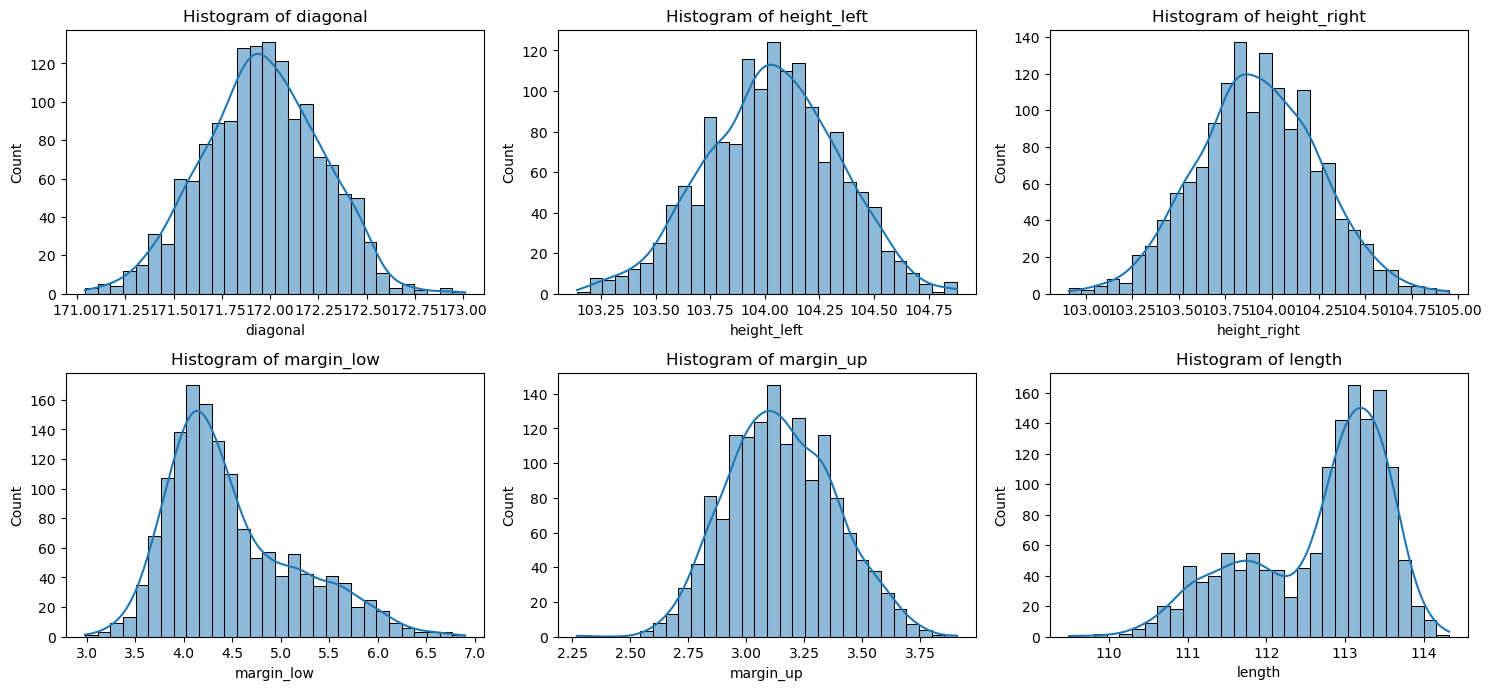

In [5]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(billets_no_mv1.columns[1:], 1):  # Exclude the 'is_genuine' column
    plt.subplot(3, 3, i)
    sns.histplot(billets_no_mv1[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

## Outliers

In [6]:
#OUTLIERS

#margin_low outliers
# Calculate quantiles
margin_low_quantile_1 = billets_no_mv1['margin_low'].quantile(0.01)
margin_low_quantile_99 = billets_no_mv1['margin_low'].quantile(0.99)

# Display outliers on both sides
outliers_low = billets_no_mv1[billets_no_mv1['margin_low'] < margin_low_quantile_1]
outliers_high = billets_no_mv1[billets_no_mv1['margin_low'] > margin_low_quantile_99]

print("Outliers on the lower side:")
display(outliers_low)

print("\nOutliers on the higher side:")
display(outliers_high)

Outliers on the lower side:


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
10,True,171.83,104.14,103.62,3.16,3.18,113.22
23,True,172.56,103.85,103.62,3.32,3.13,113.37
37,True,171.73,104.10,104.19,3.39,3.19,112.79
125,True,171.50,104.03,103.97,3.26,3.54,113.24
182,True,171.94,104.44,104.13,3.32,3.02,113.49
243,True,172.17,103.61,104.33,3.39,2.82,112.79
354,True,171.96,104.18,104.14,3.35,2.70,113.56
390,True,171.66,103.65,103.44,3.26,2.99,112.89
452,True,171.68,103.48,103.47,3.32,3.11,112.46
477,True,171.95,104.25,103.64,3.24,2.81,113.42



Outliers on the higher side:


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1027,False,171.63,104.02,104.66,6.70,3.28,111.28
1031,False,172.40,104.00,103.82,6.33,3.10,112.11
1041,False,171.77,104.12,104.42,6.65,3.63,111.53
1092,False,171.87,104.76,104.02,6.30,3.61,111.29
1110,False,171.73,104.32,104.07,6.56,3.30,112.80
1124,False,171.88,103.92,104.27,6.70,3.11,110.93
1134,False,171.91,103.70,104.41,6.34,3.50,113.05
1169,False,171.99,104.14,104.15,6.48,3.42,112.16
1254,False,171.15,104.09,104.30,6.49,3.20,111.61
1290,False,171.94,104.06,104.22,6.90,3.36,111.70


In [7]:
# Remove outliers <= margin_low_quantile_99 only
billets_no_mv2 = billets_no_mv1[billets_no_mv1['margin_low'] <= margin_low_quantile_99]

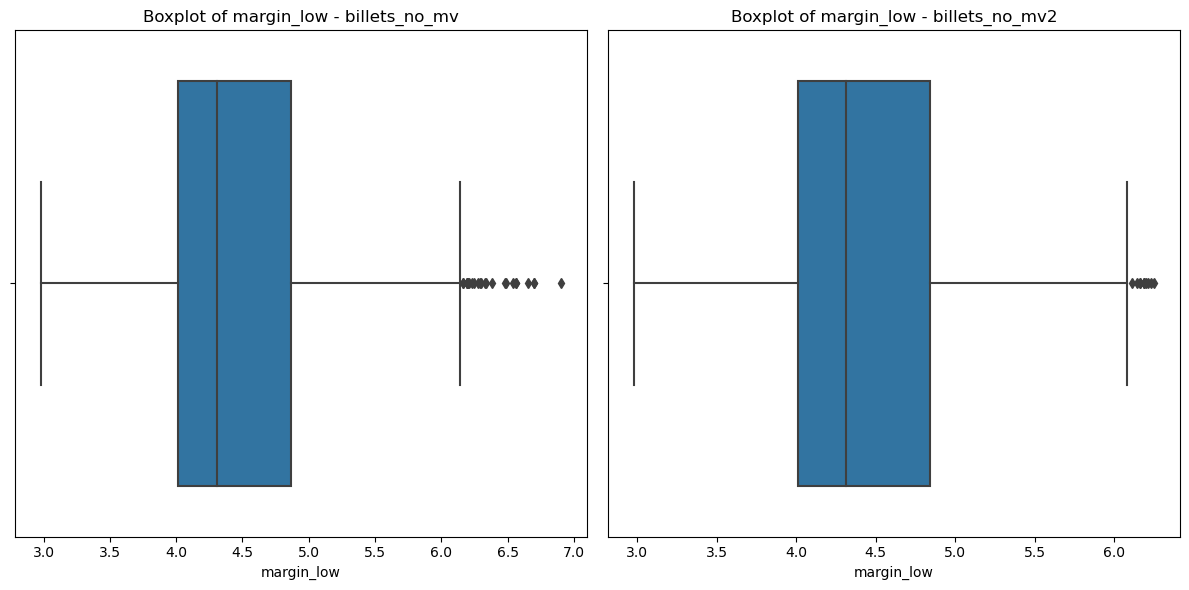

In [8]:
plt.figure(figsize=(12, 6))

# Plot boxplots for 'margin_low' in billets_no_mv
plt.subplot(1, 2, 1)
sns.boxplot(x=billets_no_mv1['margin_low'])
plt.title('Boxplot of margin_low - billets_no_mv')

# Plot boxplots for 'margin_low' in billets_no_mv2
plt.subplot(1, 2, 2)
sns.boxplot(x=billets_no_mv2['margin_low'])
plt.title('Boxplot of margin_low - billets_no_mv2')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

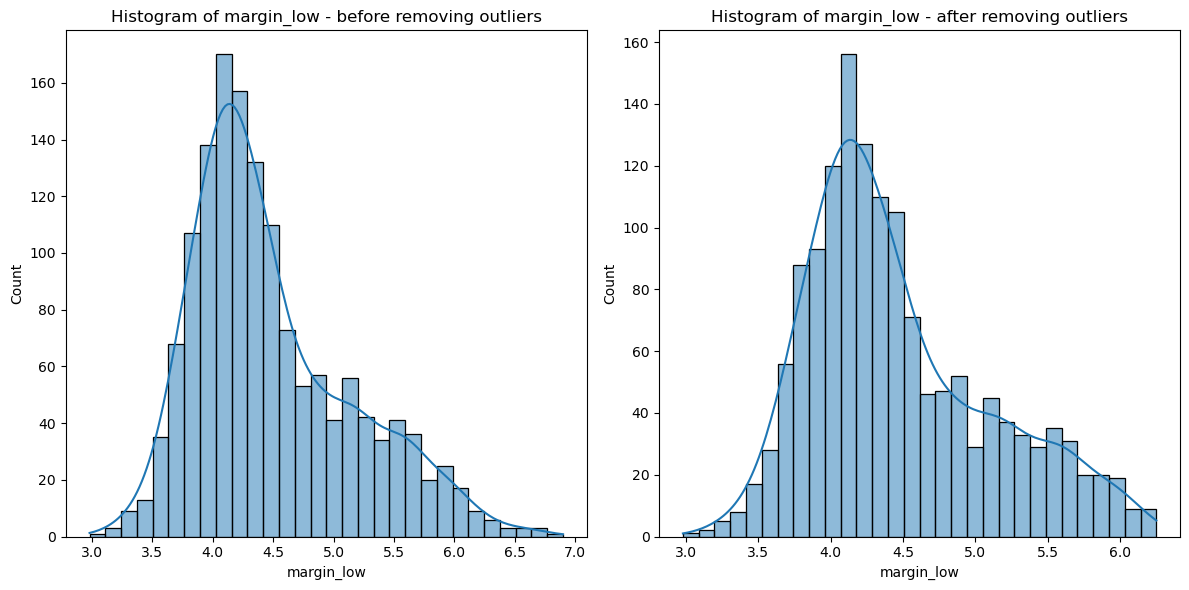

In [9]:
plt.figure(figsize=(12, 6))

# Plot histograms for 'margin_low' in billets_no_mv
plt.subplot(1, 2, 1)
sns.histplot(billets_no_mv1['margin_low'], bins=30, kde=True)
plt.title('Histogram of margin_low - before removing outliers')

# Plot histograms for 'margin_low' in billets_no_mv2
plt.subplot(1, 2, 2)
sns.histplot(billets_no_mv2['margin_low'], bins=30, kde=True)
plt.title('Histogram of margin_low - after removing outliers')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

# Prediction des valeurs manquantes

## Sélection des variables

In [10]:
# Split the dataset into two DataFrames: 'billet_mv' and 'billet_no_mv'
billet_mv = billets[billets['margin_low'].isnull()]
billet_no_mv = billets.dropna(subset=['margin_low'])

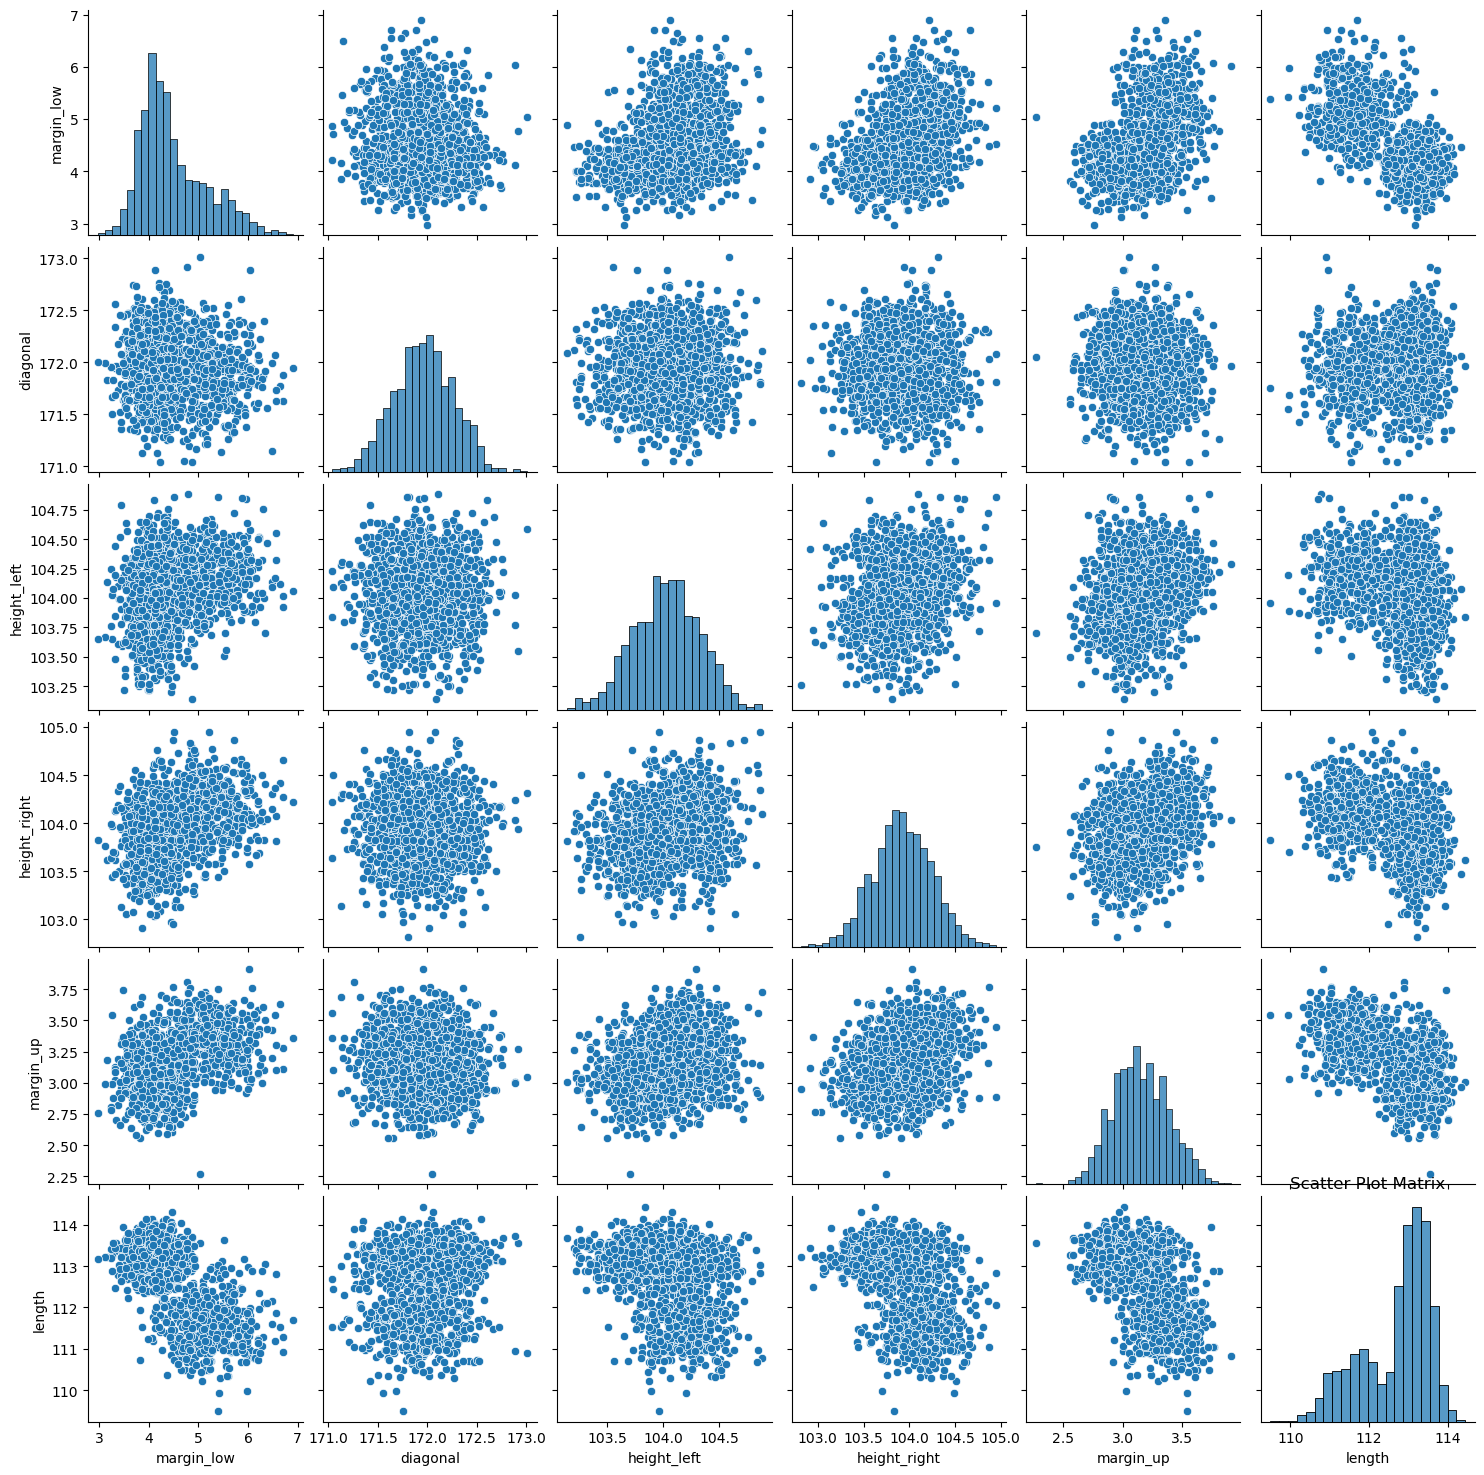

In [11]:
# Scatter plot to visualize the relationship between variables
sns.pairplot(billets[['margin_low', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']])
plt.title('Scatter Plot Matrix')
plt.show()

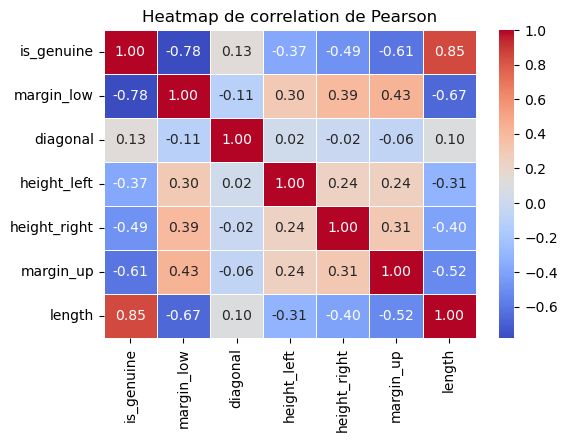

In [12]:
variables_of_interest = ['is_genuine','margin_low', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']
correlation_matrix = billet_no_mv[variables_of_interest].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap de correlation de Pearson')
plt.show()

## Régression linéaire

Une technique statistique utilisée pour modéliser la relation linéaire entre une variable dépendante (la variable "margin_low" qui représente la marge inférieure des billets) et une ou plusieurs variables indépendantes (telles que "margin_up", "length" etc.).
L'objectif est de comprendre comment les variables indépendantes influencent la variable dépendante et de créer un modèle qui peut être utilisé pour faire des prédictions.

In [13]:
# Define the independent variables (all columns except 'margin_low') and the dependent variable 'margin_low'
X = billet_no_mv.drop(columns=['margin_low'])
y = billet_no_mv['margin_low']  # Assuming that 'margin_low' is present in the DataFrame as the dependent variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert 'is_genuine' column to numeric (0 for False, 1 for True)
X_train['is_genuine'] = X_train['is_genuine'].astype(int)

# Add a constant to the independent variables to include an intercept in the model
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the OLS model using the training set
model1 = sm.OLS(y_train, X_train_sm).fit()

# Display the OLS regression results
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     294.5
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          2.94e-229
Time:                        18:38:58   Log-Likelihood:                -646.09
No. Observations:                1170   AIC:                             1306.
Df Residuals:                    1163   BIC:                             1342.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.7635      9.706      0.285   

P>|t| : La sortie de régression montre que les variables prédictives is_genuine et margin_up sont statistiquement significatives car leurs valeurs p sont < à 0,05. D'un autre côté, les autres variables ne sont pas statistiquement significatives car leurs valeurs p sont supérieures au niveau de signification habituel de 0,05.

In [14]:
#new DataFrame with only the rows where 'is_genuine' is equal to 1
billet_no_mv2 = billet_no_mv[billet_no_mv['is_genuine'] == 1]

# on choisit les variables les plus pertinentes
columns = ['margin_up', 'margin_low']
billet_no_mv2 = billet_no_mv2[columns]

display(billet_no_mv2)

,margin_up,margin_low
0,2.89,4.52
1,2.99,3.77
2,2.94,4.40
3,3.01,3.62
4,3.48,4.04
...,...,...
995,2.83,4.26
996,2.72,4.30
997,3.07,4.23
998,2.89,3.68


In [15]:
# Define the independent variables (all columns except 'margin_low') and the dependent variable 'margin_low'
X = billet_no_mv2.drop(columns=['margin_low'])
y = billet_no_mv2['margin_low']  # Assuming that 'margin_low' is present in the DataFrame as the dependent variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the independent variables to include an intercept in the model
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the OLS model using the training set
model_stats = sm.OLS(y_train, X_train_sm).fit()

# Display the OLS regression results
print(model_stats.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.577
Date:                Wed, 20 Dec 2023   Prob (F-statistic):             0.0184
Time:                        18:38:58   Log-Likelihood:                -210.21
No. Observations:                 776   AIC:                             424.4
Df Residuals:                     774   BIC:                             433.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5576      0.187     24.336      0.0

## Hypothèse de la normalité des résidus

Normalité : Les erreurs résiduelles doivent être distribuées normalement. Cela signifie que les résidus doivent suivre une distribution normale avec une moyenne de zéro

In [16]:
# Calcul des résidus

# Get residuals from the model
residuals = model_stats.resid

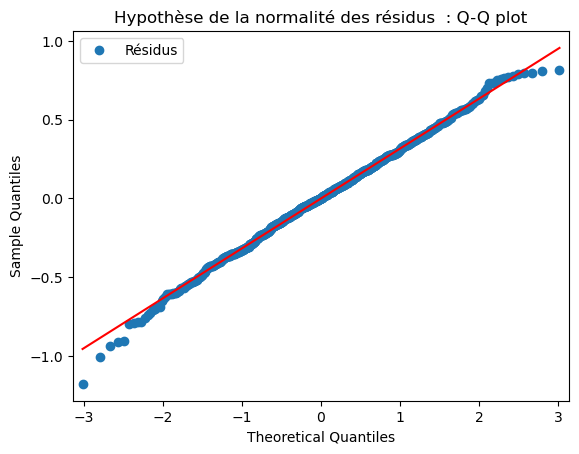

In [17]:
# Create a Q-Q plot for residuals
sm.qqplot(residuals, line='s', label="Résidus")
plt.title("Hypothèse de la normalité des résidus  : Q-Q plot")
plt.legend()
plt.show()

Test de Shapiro-Wilk

In [18]:
statistic, p_value = shapiro(residuals)

if p_value > 0.05:
    print("Les résidus semblent suivre une distribution normale (hypothèse non rejetée).")
    print("P-value :",p_value)
else:
    print("Les résidus ne suivent pas une distribution normale (hypothèse rejetée).")
    print("P-value :",p_value)

Les résidus semblent suivre une distribution normale (hypothèse non rejetée).
P-value : 0.23539568483829498


Text(0, 0.5, 'Frequency')

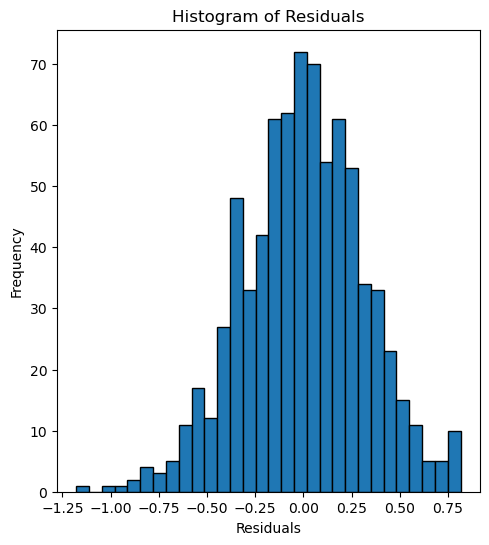

In [19]:
# Visualize residuals using a histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

## Hypothèse de l'homoscédasticité des résidus

L'homoscédasticité se réfère à la situation où les résidus (écarts entre les valeurs observées et les valeurs prédites par un modèle de régression) ont une variance constante par rapport à la variable indépendante ou aux valeurs prédites. Cela signifie que la dispersion des résidus est la même tout au long de la ligne de régression.

L'homoscédasticité assure que les estimations des erreurs standard sont valides, ce qui est crucial pour les tests d'hypothèses et la construction d'intervalles de confiance.

Amélioration du Modèle : Si on détecte de l'hétéroscédasticité, cela peut indiquer la nécessité d'améliorer le modèle de régression (par exemple, en transformant les variables ou en utilisant des modèles de régression pondérée).

In [20]:
# Calculer les prédictions
predictions = model_stats.predict(X_train_sm)

# Effectuer le test de Breusch-Pagan
bp_test = het_breuschpagan(residuals, X_train_sm)

# Les valeurs retournées par het_breuschpagan sont :
# (1) la statistique du test de Lagrange Multiplier,
# (2) la p-value du test de Lagrange Multiplier,
# (3) la statistique du test F,
# (4) la p-value du test F.
lm_statistic, lm_pvalue, f_statistic, f_pvalue = bp_test

# Set the significance level (alpha)
alpha = 0.05
# Check the p-value against the significance level
if lm_pvalue < alpha:
    print("Heteroscedasticity detected. Residuals do not have constant variance.")
else:
    print("No evidence of heteroscedasticity. Residuals have constant variance.")

print("Valeur p:", p_value)

No evidence of heteroscedasticity. Residuals have constant variance.
Valeur p: 0.23539568483829498


La p-value associée à la statistique LM est d'environ 0.252. Une p-value inférieure à 0.05 indiquerait une hétéroscédasticité statistiquement significative. Dans ce cas, la p-value est supérieure à 0.05, ce qui suggère que on ne peut pas rejeter l'hypothèse nulle d'homoscédasticité. Cela indique qu'il n'y a pas de preuve suffisante d'hétéroscédasticité dans les données.

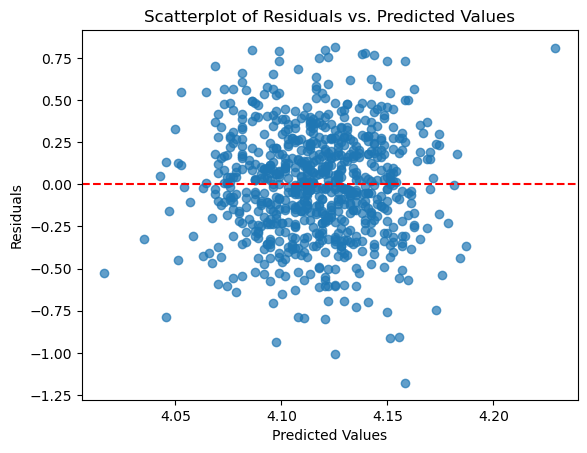

In [21]:
# Get residuals
residuals = model_stats.resid

# Create a scatterplot of residuals vs. predicted values
plt.scatter(model_stats.fittedvalues, residuals, alpha=0.7)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Scatterplot of Residuals vs. Predicted Values")
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

Interprétation Visuelle :

Homoscédasticité : Si les résidus se dispersent de manière uniforme et aléatoire autour de l'axe horizontal (zéro) sans aucun motif apparent, cela indique l'homoscédasticité.

Hétéroscédasticité : Si les résidus montrent des motifs (comme une forme en éventail, en cône, ou en S), cela suggère l'hétéroscédasticité.


## Hypothèse de Multicolinéarité

La multicolinéarité se produit lorsqu'il existe une forte corrélation entre deux ou plusieurs variables explicatives (indépendantes) dans un modèle de régression. Cela signifie que ces variables partagent une information similaire ou redondante.

In [22]:
# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

# Displaying the VIF values
display(vif_data)

,Variable,VIF
0,const,269.710571
1,margin_up,1.000000


Le VIF pour 'margin_up' est de 1.000000. Un VIF de 1 indique qu'il n'y a pas de corrélation entre cette variable indépendante et les autres variables indépendantes. En général, un VIF supérieur à 5 ou 10 indique une multicollinéarité préoccupante, nécessitant une attention supplémentaire.

Cela signifie que 'margin_up' est indépendante des autres variables explicatives du modèle, ce qui est bon pour la validité d'analyse de régression.

## Compléter les valeurs manquantes

In [23]:
# Filter 'billet_no_mv' to include only rows where 'is_genuine' is 1 (true)
billet_no_mv3 = billet_no_mv[billet_no_mv['is_genuine'] == 1]

# Select the relevant columns for the regression analysis
predictor = ['margin_up']
target = 'margin_low'

# Split 'billet_no_mv1' into training and testing sets
X = billet_no_mv3[predictor]  # Features
y = billet_no_mv3[target]     # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_r_model = LinearRegression()
linear_r_model.fit(X_train, y_train)

# Now 'linear_r_model' can be used to make predictions on 'X_test'

LinearRegression()

In [24]:
billet_mv['margin_low'] = linear_r_model.predict(billet_mv[['margin_up']])

# Display the predicted values for verification
display(billet_mv['margin_low'])

# Concatenate 'billet_no_mv' and 'billet_mv' to create 'final_df'
final_df = pd.concat([billet_no_mv, billet_mv])

# Ensure the final DataFrame is in the desired format
# Reset the index if necessary
final_df.reset_index(drop=True, inplace=True)

# Show the final DataFrame
display(final_df)

72      4.087431
99      4.103345
151     4.120705
197     4.033904
241     4.120705
251     4.130832
284     4.090325
334     4.123598
410     4.106238
413     4.100451
445     4.122152
481     4.165553
505     4.126492
611     4.080198
654     4.166999
675     4.187253
710     4.113472
739     4.110578
742     4.088878
780     4.104791
798     4.122152
844     4.125045
845     4.138065
871     4.113472
895     4.126492
919     4.184360
945     4.120705
946     4.084538
981     4.125045
1076    4.093218
1121    4.099005
1176    4.120705
1303    4.133725
1315    4.065731
1347    4.035350
1435    4.042584
1438    4.088878
Name: margin_low, dtype: float64

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.520000,2.89,112.83
1,True,171.46,103.36,103.66,3.770000,2.99,113.09
2,True,172.69,104.48,103.50,4.400000,2.94,113.16
3,True,171.36,103.91,103.94,3.620000,3.01,113.51
4,True,171.73,104.28,103.46,4.040000,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,172.17,104.49,103.76,4.133725,2.93,111.21
1496,False,172.08,104.15,104.17,4.065731,3.40,112.29
1497,False,171.72,104.46,104.12,4.035350,3.61,110.31
1498,False,172.66,104.33,104.41,4.042584,3.56,111.47


In [25]:
# Display summary statistics
display(final_df.describe())
final_df.describe(include='all')

# Check for null values
display(final_df.isnull().sum())

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.476715,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.658169,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.030000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.300000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.860000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

# Prédiction des faux billets

## Data exploration

([<matplotlib.patches.Wedge at 0x27a133c3c90>,
 [Text(-0.5500000594609755, 0.9526279098330699, 'VRAIS'),
  Text(0.5500001486524352, -0.9526278583383436, 'FAUX')],
 [Text(-0.30000003243325934, 0.5196152235453108, '66.67%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

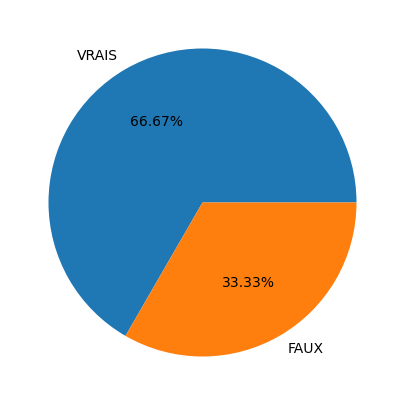

In [26]:
y = final_df['is_genuine']
plt.figure(figsize=(5, 5))
plt.pie(y.value_counts(), labels=["VRAIS", "FAUX"], autopct='%.2f%%')

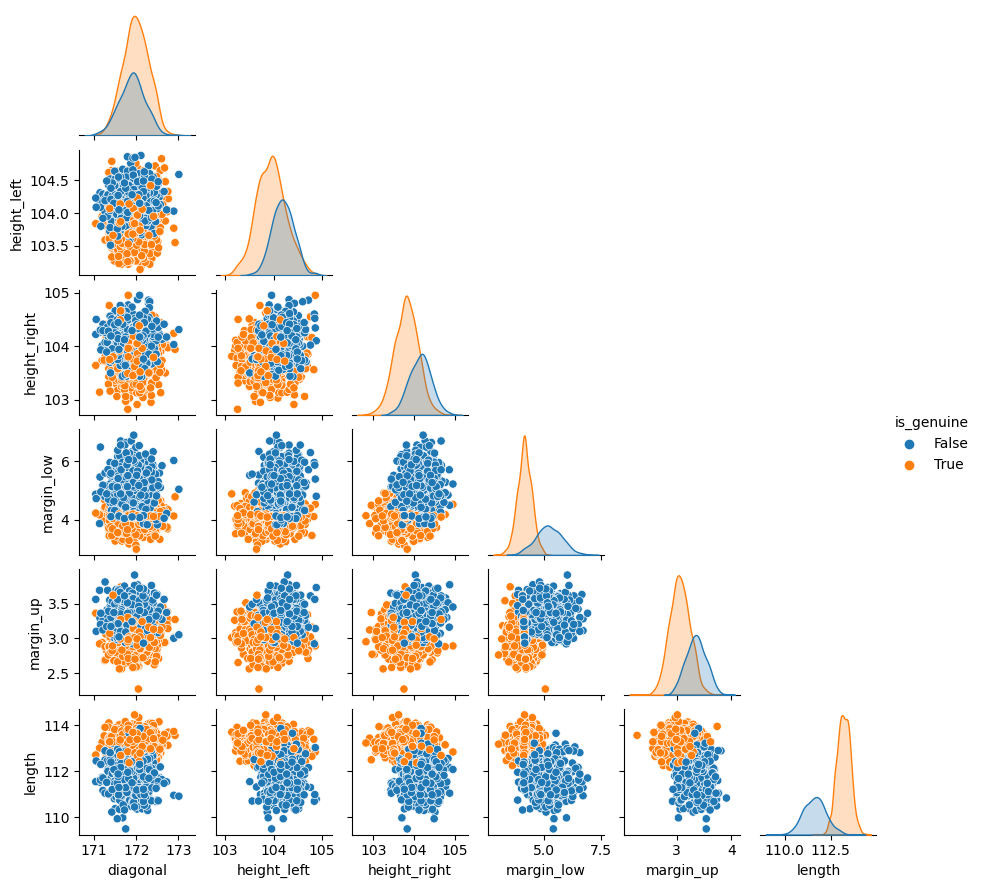

In [27]:
ax = sns.pairplot(final_df, hue='is_genuine', corner=True, height=1.5)
plt.show()

Forged banknotes have tendanecy to be shorter

<Axes: >

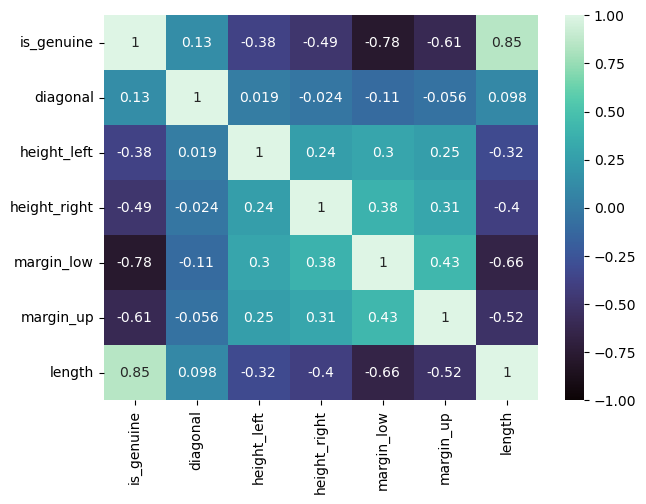

In [28]:
plt.figure(figsize=(7,5))
sns.heatmap(final_df.corr(), annot=True, vmin=-1.0, cmap='mako')

Les variables length et margin_low semblent sont les deux variables les plus corrélées avec is_genuine. Ils sont donc les variables les plus influentes pour déterminer si un billet est vrai ou faux.

Margin_low et length sont aussi corrélées entre elles.

## Selection des variables

L'importance des caractéristiques (variables indépendantes) dans la prédiction de la variable cible "is_genuine" (vrais ou faux billets) en utilisant l'algorithme Random Forest.

L'algorithme Random Forest est un ensemble d'arbres de décision qui combine les prédictions de plusieurs arbres individuels pour améliorer la précision et réduire le surajustement (overfitting). Il est capable de gérer des ensembles de données complexes et de capturer des relations non linéaires entre les caractéristiques et la variable cible. L'importance des caractéristiques permet de déterminer quelles variables ont le plus d'influence sur les prédictions du modèle. 

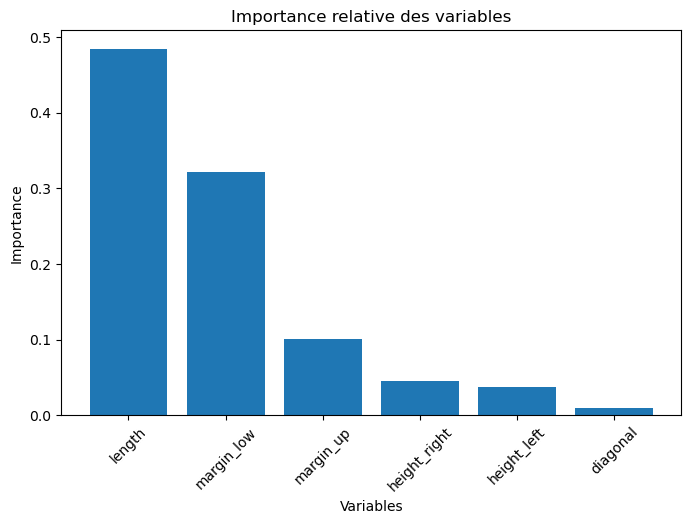

In [29]:
# Importance des caractéristiques selon Random Forest

X = final_df.drop('is_genuine', axis=1)
y = final_df['is_genuine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(8, 5))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Importance relative des variables')
plt.xticks(rotation=45)
plt.show()

In [30]:
# List of chosen columns
selected_columns = ['is_genuine', 'margin_low', 'margin_up', 'length']

# Create a new DataFrame with selected columns
new_df = final_df[selected_columns]

# Régression Logistique 

La régression logistique est une technique d'analyse utilisée en apprentissage automatique pour résoudre des problèmes de classification.

Objectif de la Régression Logistique :

L'objectif est de prédire si un billet est vrai (classe positive) ou faux (classe négative) en fonction de certaines caractéristiques mesurées sur ce billet, telles que la marge, la longueur, etc.
Nature de la Variable Cible :

La variable cible est binaire : 0 pour les billets faux (classe négative) et 1 pour les billets vrais (classe positive).

In [31]:
# Sélectionner les variables indépendantes et la variable dépendante
X = new_df.drop('is_genuine', axis=1).copy()
y = new_df['is_genuine'].copy()

# Séparer les données en ensembles de train et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Créer et entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

#  Predictions on the test set
y_pred = model.predict(X_test)

La fonction train_test_split est utilisée pour diviser les données en deux ensembles distincts : un ensemble d'entraînement (train) et un ensemble de test (test).
Les données d'entraînement sont utilisées pour entraîner le modèle, c'est-à-dire pour lui apprendre à faire des prédictions à partir des caractéristiques.
Les données de test sont utilisées pour évaluer les performances du modèle après qu'il a été entraîné.

X : Les caractéristiques à diviser en ensembles d'entraînement et de test.
y : La variable cible à diviser en ensembles d'entraînement et de test.

Une fois que les données sont divisées en ensembles d'entraînement et de test, un modèle de régression logistique est créé en utilisant la classe LogisticRegression de scikit-learn.
Le modèle est ensuite entraîné sur les données d'entraînement à l'aide de la méthode fit.

Prédictions sur l'Ensemble de Test :
Une fois le modèle entraîné, il est utilisé pour faire des prédictions sur l'ensemble de test (X_test). Les prédictions sont stockées dans la variable y_pred

In [32]:
# Calculer le taux de précision
accuracy = accuracy_score(y_test, y_pred)
print("Taux de précision (Accuracy):", accuracy *100, " %")

Taux de précision (Accuracy): 99.33333333333333  %


In [33]:
y.value_counts()

is_genuine
True     1000
False     500
Name: count, dtype: int64

In [34]:
x = sm.add_constant(X)
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

results_log.summary()

Optimization terminated successfully.
         Current function value: 0.032576
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1496
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Dec 2023   Pseudo R-squ.:                  0.9488
Time:                        18:39:05   Log-Likelihood:                -48.863
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -674.6869     88.179     -7.651      0.000    -847.514    -501.860
margin_low    -6.1871      0.860     -7.196      0.000      -7.872      -4.502
margin_up    -10.0930      1.931     -5.228      0.000     -13.877      -6.309
length         6.5334      0.819      7.978      0.000       4.928       8.139
==============================================================================

Possibly complete quasi-separation: A fraction 0.50 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Pseudo R-squ.: 0.9488 : 
Cette mesure est une indication de la qualité de l'ajustement du modèle. Un pseudo R-carré proche de 1 suggère un très bon ajustement.

LLR p-value: 0.000
La p-value du rapport de vraisemblance (Likelihood Ratio Test) est une mesure de la significativité globale du modèle. Une p-value très faible (ici 0.000) indique que le modèle dans son ensemble est statistiquement significatif. Cela signifie que les prédicteurs du modèle, lorsqu'ils sont pris ensemble, ont un effet significatif sur la prédiction de la variable dépendante.

Erreur Standard (std err) et Signification des Coefficients :
Les erreurs standard reflètent la variabilité de chaque estimation de coefficient. Des valeurs plus faibles indiquent des estimations plus précises.
Les valeurs z (rapport du coefficient à son erreur standard) et les p-values associées testent si chaque coefficient est significativement différent de zéro. Ici, tous les coefficients sont significatifs car les p-values sont inférieures à 0.05.

In [35]:
# On enregistre notre model pour pouvoir l'utiliser sur d'autres notebook
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

## Matrice de confusion

permet d'évaluer la performance d'un modèle de classification en comparant les prédictions du modèle aux véritables valeurs de la classe.

In [36]:
# Evaluate the model using confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[110   1]
 [  1 188]]


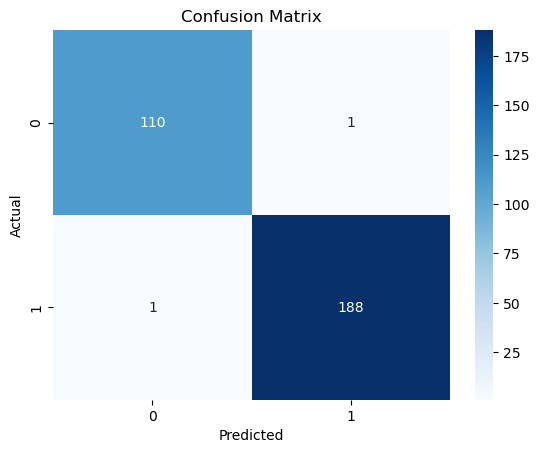

In [37]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Vrais Négatifs (VN) : 110 
110 billets ont été correctement prédits comme faux par le modèle.

Faux Positifs (FP) : 1 
Un seul billet a été incorrectement prédit comme authentique alors qu'il était en réalité faux.

Faux Négatifs (FN) : 1 
Un seul billet a été incorrectement prédit comme faux alors qu'il était authentique.

Vrais Positifs (VP) : 188 
188 billets ont été correctement prédits comme étant authentiques par le modèle.

Sensibilité (Rappel) : La capacité du modèle à identifier correctement les vrais billets.
Le modèle a une haute sensibilité, car il a correctement identifié la plupart des billets authentiques.

Spécificité : La capacité du modèle à identifier correctement les faux billets.
Le modèle a une haute spécificité, car il a également correctement identifié la plupart des faux billets.

## Classification Report

In [38]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       111
        True       0.99      0.99      0.99       189

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



Interprétation Globale :
Haute Précision et Rappel : Des valeurs de précision et de rappel proches de 1 (0.99) indiquent une excellente performance du modèle pour les deux classes.

Score F1 Élevé : Un score F1 proche de 1 pour les deux classes suggère un très bon équilibre entre la précision et le rappel.

Accuracy Globale : La précision globale du modèle est de 0.99, ce qui signifie que 99% des prédictions totales sont correctes

## RMSD

The Root Mean Square Deviation (RMSD)  est une mesure utilisée pour évaluer la différence entre les valeurs prédites par un modèle et les valeurs réellement observées. 

In [39]:
# Get predicted probabilities for class 1
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate RMSD for probabilities
rmsd = mean_squared_error(y_test, y_prob, squared=False)

# Print the RMSD for probabilities
print(f"Root Mean Square Deviation (RMSD) for Probabilities: {rmsd}")

Root Mean Square Deviation (RMSD) for Probabilities: 0.08618362501701025


Une RMSD de 0.086 est relativement faible, ce qui suggère que les prédictions de probabilités générées par le modèle sont, en moyenne, assez proches des valeurs réelles observées.
Plus la valeur de RMSD est proche de 0, meilleure est la précision des prédictions du modèle. Une valeur de RMSD faible indique donc que le modèle a une bonne performance.

# K-means clustering

In [40]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_df.drop('is_genuine', axis=1))

# Application de l'algorithme K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
new_df["cluster"] = kmeans.fit_predict(X_scaled)

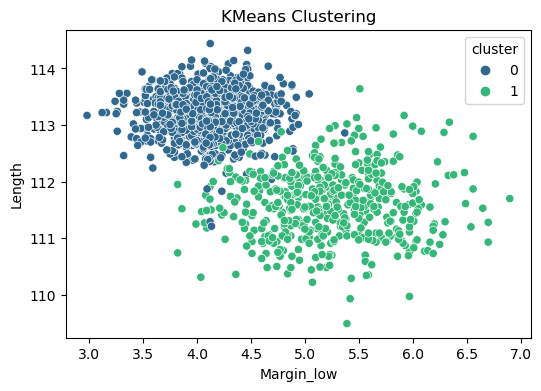

In [41]:
# Visualize KMeans clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x='margin_low', y='length', hue='cluster', data=new_df, palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Margin_low')
plt.ylabel('Length')
plt.show()

# Comparaison de deux modèles : K-means clustering et Régression logistique

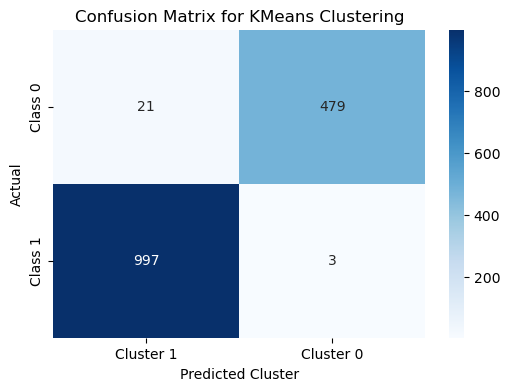

In [42]:
true_labels = new_df['is_genuine']

# Create a confusion matrix
conf_matrix2 = confusion_matrix(true_labels, new_df['cluster'])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d',cmap='Blues', 
            xticklabels=['Cluster 1', 'Cluster 0'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for KMeans Clustering')
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual')
plt.show()

Vrais Positifs (VP) : vrais billets correctement identifiés comme vrais (VP = 997).

Faux Positifs (FP) : faux billets incorrectement identifiés comme vrais (FP = 3).

Faux Négatifs (FN) : vrais billets incorrectement identifiés comme faux (FN = 21).

Vrais Négatifs (VN) : faux billets correctement identifiés comme faux (VN = 479).

In [43]:
VP = 997  
FP = 3    
FN = 21
VN = 479

# Calculating precision
precision = (VP+VN)/(VP+FP+FN+VN)
precision_percentage = precision * 100  # Convert to percentage

print(precision_percentage, " %")

98.4  %


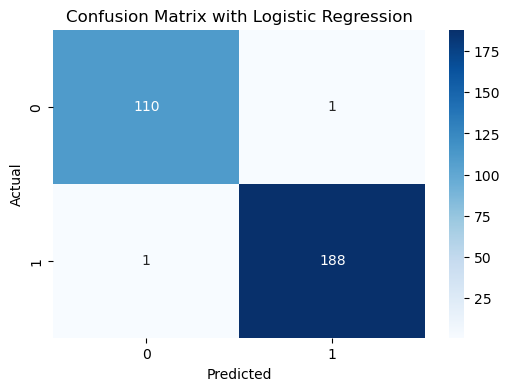

In [44]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix with Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test du modèle

In [55]:
billets_production = pd.read_csv("C:/Users/dawid/OneDrive/Documents/OpenClassrooms/Projet 10/billets_test.csv", delimiter=',')
display(billets_production)

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [56]:
# Use the same features that you used for training
selected_features = ['margin_low', 'margin_up', 'length']
X_test = billets_production[selected_features]

# Make predictions
predictions = model.predict(X_test)
# Add the predictions to the test_data DataFrame
billets_production['predictions'] = predictions

In [57]:
# Display the test_data DataFrame with predictions
display(billets_production)

,diagonal,height_left,height_right,margin_low,margin_up,length,id,predictions
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,True
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,False
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,True
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,False
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,False


In [58]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9933333333333333
Confusion Matrix:
[[110   1]
 [  1 188]]
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       111
        True       0.99      0.99      0.99       189

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



([<matplotlib.patches.Wedge at 0x27a12c59d10>,
 [Text(-0.33991877217145816, 1.046162142464278, 'FORGED'),
  Text(0.3399188701202255, -1.0461621106387813, 'GENUINE')],
 [Text(-0.18541023936624987, 0.5706338958896061, '60.00%'),
  Text(0.18541029279285026, -0.5706338785302443, '40.00%')])

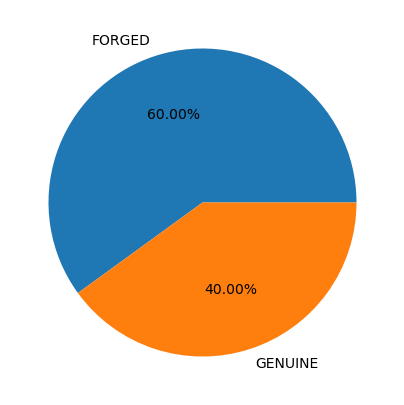

In [59]:
y = billets_production['predictions']
plt.figure(figsize=(5, 5))
plt.pie(y.value_counts(), labels=["FORGED", "GENUINE"], autopct='%.2f%%')